# STEAM DATA TREND (2024)


# DESCRIPTION

We want to chart:
Average playtime vs publisher class
Average playtime vs review score
Average playtime vs price

# MISC

-- Data set did not specify currency, had to double check to make sure  
-- Some games might have been translated indepdently, steamId still valid  
-- Some games are incorrectly labeled or missing information (WWE 2k24 was deluxe edition)  
-- Found a price outlierr in wwe 2k24 since (99.99)  
-- Revenue data based on estimates

## About this data set:
This dataset contains comprehensive information on the top 1500 games released on Steam between January 1, 2024, and September 9, 2024. Aggregated from 30 separate files, and combined into a single dataset. Minor adjustments were made, such as aligning game release dates for consistency.

## Key Features:
Game Details: Includes titles, release dates, and developer/publisher information.
Sales and Revenue: Tracks the number of copies sold, revenue generated, and pricing details.
Player Engagement: Provides average playtime, peak player counts, and other user engagement metrics.
Reviews and Scores: Features review scores and ratings.
Dynamic Market Data: Offers insights into game performance trends over time, such as sales rank and price fluctuations.


In [3]:
import pandas as pd

data = pd.read_csv('./Steam_2024_bestRevenue_1500.csv')


data.sort_values(by='price', ascending=False, inplace=True)

#data cleaning
#data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1197
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 140.6+ KB


Will investigate  missing developers and publishers

In [4]:
data[data['developers'].isna()]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
643,YUME 4,12-01-2024,18572,4.99,54457.0,1.225076,78,Indie,Lovely Games,NaN,2602730
765,Hypnosis Card,19-01-2024,10812,4.99,41891.0,2.016618,77,Indie,Lovely Games,NaN,2544990


In [5]:
data[data['publishers'].isna()]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
710,Pixel Noir,08-02-2024,3129,24.99,47871.0,8.461324,67,Hobbyist,NaN,SWDTech Games,754320


Using Steam ID we identified developers and publishers for the missing data

In [6]:
data.loc[data['steamId'] == 2602730, 'developers'] = 'Lovely Games'
data.loc[data['steamId'] == 2544990, 'developers'] = 'Naku kinoko'
data.loc[data['steamId'] == 754320, 'publishers'] = 'SWDTech Games'

In [7]:
data[data['developers'].isna()]
data[data['publishers'].isna()]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId


In [8]:
print(data.duplicated().sum())

0


Found no duplicates

In [9]:
(data == "").sum()
(data == " ").sum()


name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

checked for empty strings and blank spaces

In [10]:
columns_to_check = ['price', 'copiesSold', 'revenue', 'avgPlaytime', 'reviewScore']
data[data[columns_to_check].lt(0).any(axis=1)]

data.sort_values(by='copiesSold', ascending=False, inplace=True)

print(data.head())

                    name releaseDate  copiesSold  price       revenue  \
1403              Banana  23-04-2024    30739148   0.00  3.129158e+05   
1452            Palworld  18-01-2024    16704850  29.99  3.923286e+08   
1450  Black Myth: Wukong  19-08-2024    15517278  59.99  8.377934e+08   
1451       HELLDIVERS™ 2  08-02-2024    11905198  39.99  4.356356e+08   
1457       7 Days to Die  25-07-2024     9877443  44.99  8.978193e+07   

      avgPlaytime  reviewScore publisherClass  \
1403    26.142054           85          Indie   
1452    41.840761           94             AA   
1450    20.065041           96            AAA   
1451    39.205960           71            AAA   
1457    85.913585           89             AA   

                           publishers                    developers  steamId  
1403                              Sky  Sky,AestheticSpartan,O'Brian  2923300  
1452                       Pocketpair                    Pocketpair  1623730  
1450                     Game

Checked for negative values in numerical columns

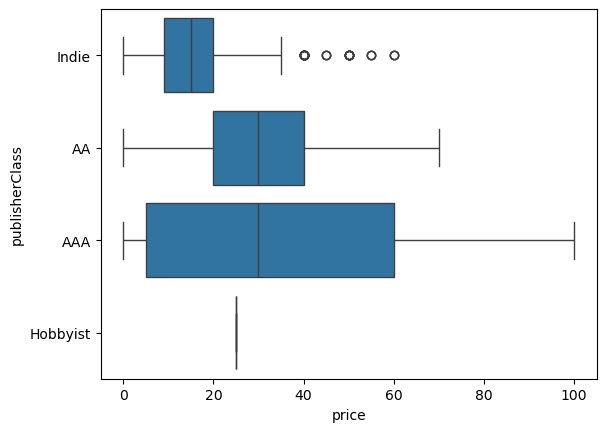

In [11]:
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data, x='price', y='publisherClass')
plt.show()


## Check Numerical Data Columns - Visual Overview

<Axes: xlabel='revenue', ylabel='Count'>

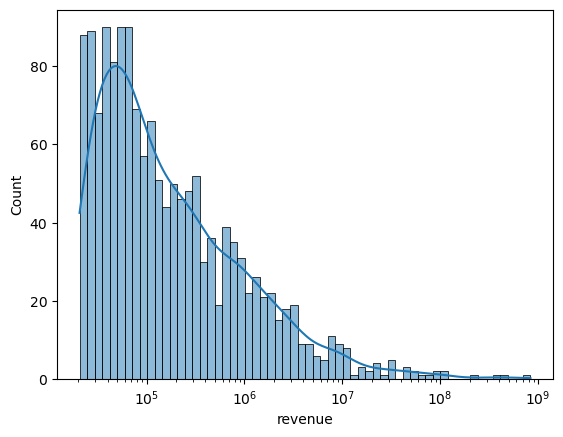

In [30]:
import seaborn as sns

sns.histplot(data['revenue'], bins=60, log_scale=True, kde=True)


<Axes: xlabel='copiesSold', ylabel='Count'>

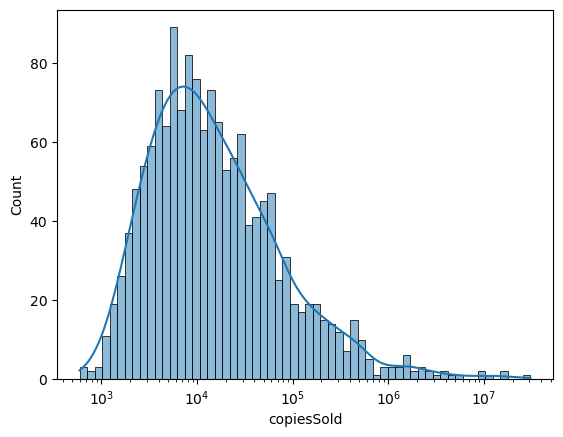

In [31]:
sns.histplot(data['copiesSold'], bins=60, log_scale=True,kde=True)

<Axes: xlabel='reviewScore', ylabel='Count'>

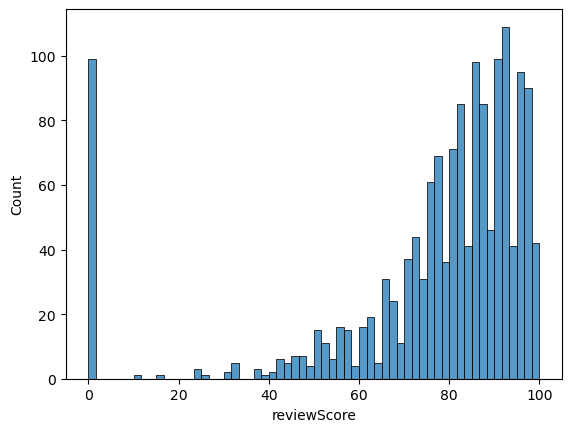

In [26]:
sns.histplot(data['reviewScore'], bins=60, log_scale=False)

<Axes: xlabel='avgPlaytime', ylabel='Count'>

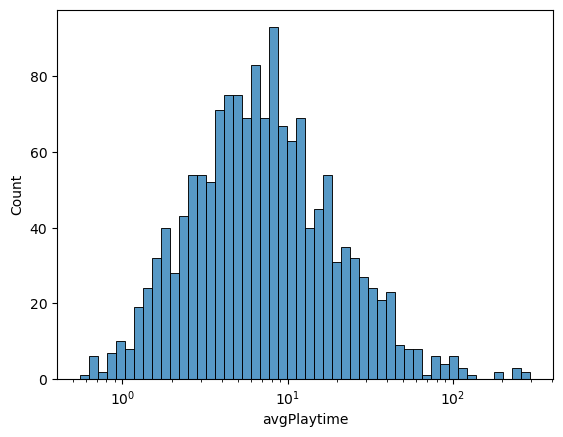

In [45]:
sns.histplot(data['avgPlaytime'], bins=50, log_scale=True)

### Why log scale average playtime?
Imagine this distribution of average playtime:

80% of games: 1–10 hours

15% of games: 10–100 hours

5% of games: 100–1000+ hours

If you plot this on a linear histogram, the 1–10 hour range will dominate the graph, and the long-play games get squished into a tiny sliver.

#### What the log scale does in this context:
Spreads out the low end (1–10 hours)

Compresses the high end (100–1000+ hours)

Makes the overall shape of the distribution more readable

Helps reveal patterns in both casual and hardcore games

<Axes: xlabel='price', ylabel='Count'>

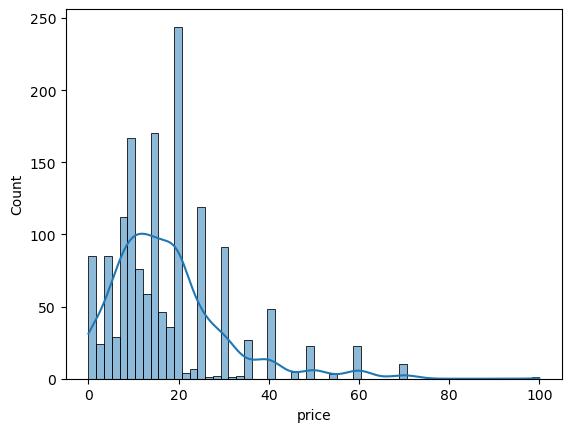

In [46]:
sns.histplot(data['price'], log_scale=False,kde=True)

## Check Categorical Data Columns - Visual Overview
Relevant columns publisher class, developers, publishers